In [1]:
cd ..

/home/araxal/coursework


In [2]:
import numpy as np
import torch
from torch import nn
from utils.genre_classification import evaluate, executor, feature_preparator
from utils.genre_classification.plot_metrics import plot_metrics
from models.genre_classification.FeedForwardModel import FeedForwardModel
from utils.genre_classification.plot_confusion_matrix import plot_confusion_matrix

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
BATCH_SIZE = 64
NUM_CLASSES = 8
DEVICE = torch.device('cuda')

In [5]:
%%time
train_data_loader, val_data_loader, test_data_loader, idx_to_label = feature_preparator(
    'features/genre_classification/vggish.p',
    BATCH_SIZE,
    normalize=False
)

def transform_idx_to_label(x):
    return idx_to_label[x]

CPU times: user 126 ms, sys: 64.8 ms, total: 191 ms
Wall time: 203 ms


In [6]:
next(iter(train_data_loader))[0].shape

torch.Size([64, 20, 128])

In [7]:
train_labels = []
val_labels = []
test_labels = []

for x, label in train_data_loader:
    train_labels.append(label)

for x, label in val_data_loader:
    val_labels.append(label)

for x, label in test_data_loader:
    test_labels.append(label)

print('Train', np.unique(torch.cat(train_labels).numpy(), return_counts=True))
print('Val', np.unique(torch.cat(val_labels).numpy(), return_counts=True))
print('Test', np.unique(torch.cat(test_labels).numpy(), return_counts=True))
print(idx_to_label)

Train (array([0, 1, 2, 3, 4, 5, 6, 7]), array([1169, 1180, 1172, 1157, 1169, 1174, 1105, 1154]))
Val (array([0, 1, 2, 3, 4, 5, 6, 7]), array([249, 252, 251, 248, 250, 249, 237, 248]))
Test (array([0, 1, 2, 3, 4, 5, 6, 7]), array([249, 252, 249, 248, 250, 253, 235, 248]))
{0: 'Blues', 1: 'Classical', 2: 'Electronic', 3: 'Folk', 4: 'Hip-Hop', 5: 'Jazz', 6: 'Pop', 7: 'Rock'}


## Перцептрон

 16%|█▌        | 16/100 [00:13<01:08,  1.22it/s]

Early stop!


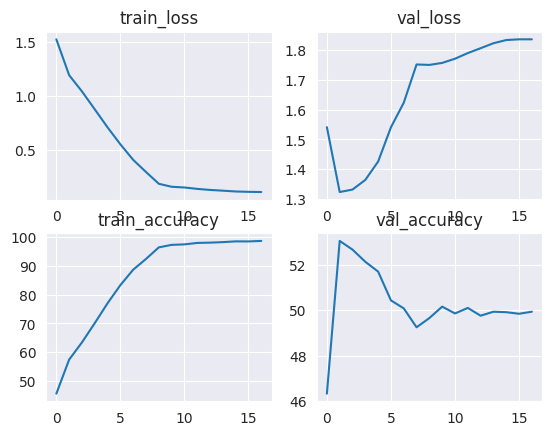

In [8]:
ff_simple_model = FeedForwardModel(20 * 128, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, ff_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.47      0.45      0.46       250
   Classical       0.69      0.75      0.72       253
  Electronic       0.46      0.47      0.46       251
        Folk       0.37      0.35      0.36       247
     Hip-Hop       0.70      0.74      0.72       250
        Jazz       0.48      0.53      0.50       251
         Pop       0.32      0.25      0.28       236
        Rock       0.42      0.43      0.42       246

    accuracy                           0.50      1984
   macro avg       0.49      0.50      0.49      1984
weighted avg       0.49      0.50      0.49      1984



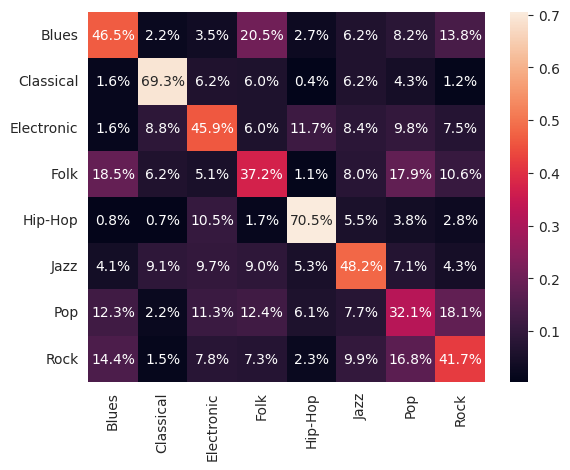

In [9]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, ff_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по времени

 16%|█▌        | 16/100 [00:17<01:31,  1.09s/it]

Early stop!


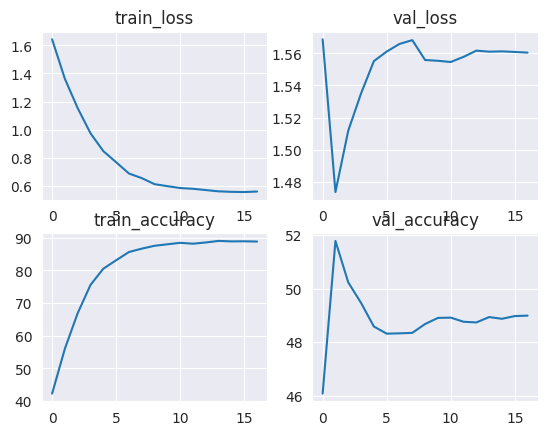

In [13]:
from models.genre_classification.Conv1Model import Conv1Model

conv_1_model = Conv1Model(NUM_CLASSES, time_size=20, feature_size=128, n_conv_layers=2).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_1_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.44      0.42      0.43       249
   Classical       0.72      0.77      0.75       253
  Electronic       0.45      0.43      0.44       251
        Folk       0.34      0.34      0.34       248
     Hip-Hop       0.65      0.74      0.69       251
        Jazz       0.49      0.43      0.46       250
         Pop       0.29      0.26      0.27       236
        Rock       0.42      0.46      0.44       246

    accuracy                           0.48      1984
   macro avg       0.48      0.48      0.48      1984
weighted avg       0.48      0.48      0.48      1984



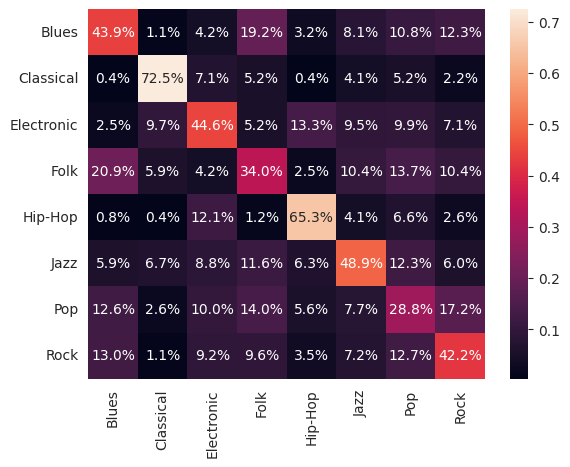

In [14]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_1_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по фичам

 16%|█▌        | 16/100 [00:18<01:38,  1.17s/it]

Early stop!


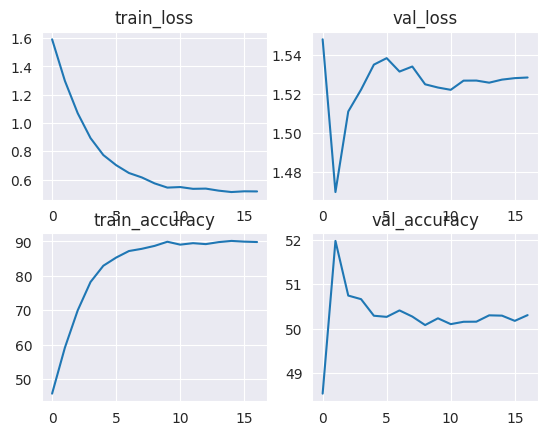

In [16]:
from models.genre_classification.Conv2Model import Conv2Model

conv_2_model = Conv2Model(NUM_CLASSES, 128, 20, n_conv_layers=2).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_2_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.45      0.50      0.47       249
   Classical       0.69      0.77      0.72       252
  Electronic       0.39      0.48      0.43       250
        Folk       0.43      0.39      0.41       247
     Hip-Hop       0.74      0.72      0.73       252
        Jazz       0.53      0.50      0.52       252
         Pop       0.36      0.26      0.31       235
        Rock       0.47      0.45      0.46       247

    accuracy                           0.51      1984
   macro avg       0.51      0.51      0.51      1984
weighted avg       0.51      0.51      0.51      1984



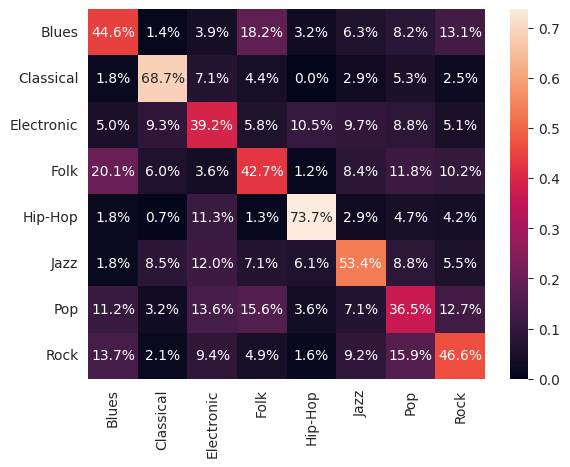

In [17]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_2_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## LSTM

 42%|████▏     | 42/100 [00:59<01:21,  1.41s/it]

Early stop!


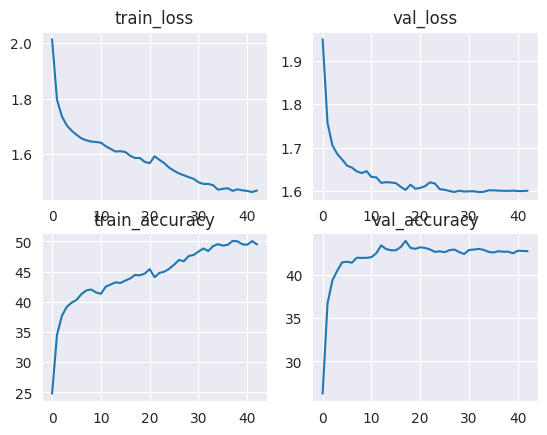

In [18]:
from models.genre_classification.LSTMModel import LSTMModel

lstm_simple_model = LSTMModel(128, 256, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, lstm_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=1e-4, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.38      0.33      0.35       250
   Classical       0.72      0.69      0.71       252
  Electronic       0.35      0.44      0.39       252
        Folk       0.35      0.37      0.36       247
     Hip-Hop       0.59      0.63      0.61       249
        Jazz       0.40      0.44      0.42       252
         Pop       0.22      0.18      0.20       236
        Rock       0.45      0.42      0.43       246

    accuracy                           0.44      1984
   macro avg       0.43      0.44      0.43      1984
weighted avg       0.44      0.44      0.44      1984



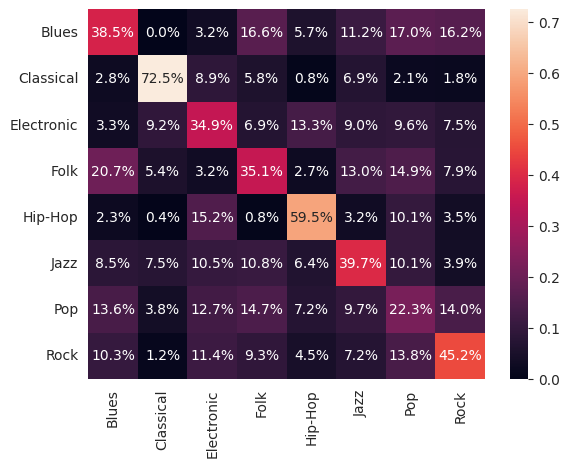

In [19]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, lstm_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Трансформер

 34%|███▍      | 69/200 [03:45<07:08,  3.27s/it]

Early stop!


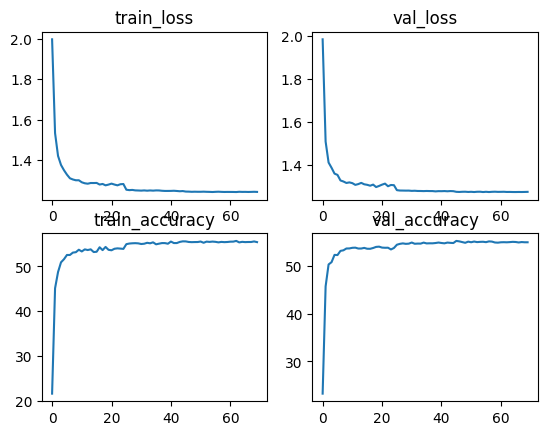

In [15]:
from models.genre_classification.TransformerModel import TransformerModel

transformer_model = TransformerModel(
    input_dim=128,
    num_layers=6,
    output_dim=NUM_CLASSES,
    num_heads=16,
    dropout=0.1,
    hidden_dim=512
).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    transformer_model,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=200,
    learning_rate=0.0001,
    weight_decay=0.1,
    evaluate_per_iteration=10,
    early_stop_after=(15,  0.001),
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.49      0.47      0.48       250
   Classical       0.73      0.75      0.74       251
  Electronic       0.44      0.55      0.49       251
        Folk       0.44      0.43      0.44       247
     Hip-Hop       0.73      0.77      0.75       251
        Jazz       0.52      0.58      0.55       253
         Pop       0.35      0.20      0.26       236
        Rock       0.50      0.51      0.50       245

    accuracy                           0.53      1984
   macro avg       0.52      0.53      0.52      1984
weighted avg       0.53      0.53      0.53      1984



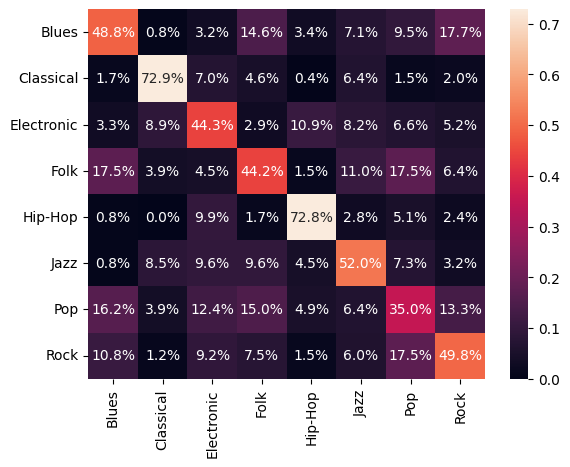

In [16]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, transformer_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)